<center><h1><font color=yellow><i> Deep Learning </i></font></h1></center>

# $Import$ $Libraries$ :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras_tuner


# $Data$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Import **data** (pandas dataframe). 

In [2]:
df_spam=pd.read_csv('spam.csv')
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<b><font color="skyblue">Step 2:</font></b>
 
- Separate the output (the column `spam`) and the input (the other columns). 

In [3]:
y=df_spam['spam']
X=df_spam.drop('spam',axis=1)

In [4]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [6]:
X.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


<b><font color="skyblue">Step 3:</font></b>
 
- Split our data into **train data** (80% -- 3680 rows) and **test data** (921 rows). 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# $DNN$

## $Building$ $our$ $Model$ : (Keras sans optimization des hyperparamètres)

<b><font color="skyblue">Step 1:</font></b>
 
- Creation of our model using **Keras**.

In [25]:
model1 = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[57], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(100, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               5800      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                      

<b><font color="skyblue">Step 2:</font></b>
 
- Precise the `optimizer`, the `loss-fonction` & the `metric`.

In [27]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

<b><font color="skyblue">Step 3:</font></b>
 
- Train the model.

In [28]:
hist = model1.fit(X_train,
                 y_train,
                 batch_size=32,
                 epochs=50,
                 validation_split=0.2)

Epoch 1/50


c:\Users\ELITEBOOK\anaconda3\envs\ner\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


74/74 [==============================] - 3s 12ms/step - loss: 0.7049 - accuracy: 0.6382 - val_loss: 0.6192 - val_accuracy: 0.7284
Epoch 2/50
74/74 [==============================] - 0s 6ms/step - loss: 0.6444 - accuracy: 0.6726 - val_loss: 0.5698 - val_accuracy: 0.6978
Epoch 3/50
74/74 [==============================] - 1s 8ms/step - loss: 0.6181 - accuracy: 0.6870 - val_loss: 0.5675 - val_accuracy: 0.7012
Epoch 4/50
74/74 [==============================] - 0s 7ms/step - loss: 0.6021 - accuracy: 0.6854 - val_loss: 0.5608 - val_accuracy: 0.7029
Epoch 5/50
74/74 [==============================] - 0s 6ms/step - loss: 0.5932 - accuracy: 0.6960 - val_loss: 0.5441 - val_accuracy: 0.7131
Epoch 6/50
74/74 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.6887 - val_loss: 0.5468 - val_accuracy: 0.7046
Epoch 7/50
74/74 [==============================] - 1s 7ms/step - loss: 0.5569 - accuracy: 0.7176 - val_loss: 0.5446 - val_accuracy: 0.7097
Epoch 8/50
74/74 [============

<b><font color='red'>PS :</font></b> The accuracy of our model on the validation data is **93%**

In [12]:
history_df = pd.DataFrame(hist.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.679268,0.646739,0.597993,0.733696
1,0.612044,0.689198,0.617314,0.676630
2,0.585873,0.700408,0.598776,0.682065
3,0.566632,0.711617,0.569040,0.717391
4,0.545494,0.727921,0.553915,0.703804


Nous allons tracer la courbe de la fonction loss (pour l'entrainement et la validation) en fonction du nombre d'epochs

Minimum validation loss: 0.20647987723350525


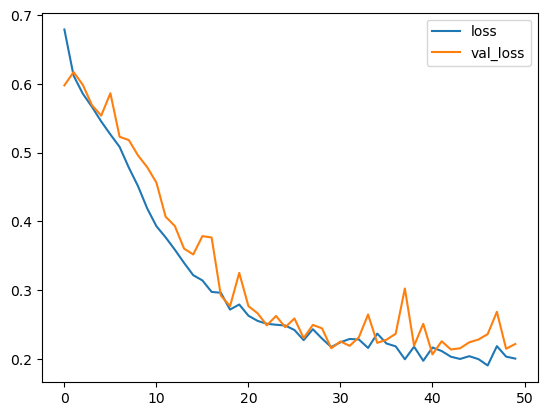

In [13]:
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## $Keras$ $tuner$ : (Le deuxième modèle en optimisant les hyperparamètres)

Dans cette partie, nous allons utiliser **Keras Tuner** pour effectuer une recherche d'hyperparamètres pour un modèle de réseau de neurones. Le but de cette parrtie est de trouver les meilleures **valeurs** d'hyperparamètres pour maximiser la précision (`accuracy`) du modèle sur un ensemble de validation.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import accuracy_score

def build_model(hp):
    """
    Fonction construisant et configurant un modèle de réseau de neurones 
    en fonction des hyperparamètres spécifiés.

    Parameters 
    ----------
    hp : de type HyperParameters fourni par Keras Tuner. Il est utilisé pour spécifier les valeurs des hyperparamètres du modèle. 

    Returns
    -------
    model : est une instance de Sequential dans Keras, représentant le modèle de réseau de neurones configuré avec les 
    hyperparamètres spécifiés.
    """

    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=150, max_value=200, step=20),
                           activation='relu', input_shape=[57], name='hidden_layer1'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=hp.Int('units2', min_value=100, max_value=200, step=20),
                           activation='relu', name='hidden_layer2'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))

    model.compile(
        optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[1e-2, 1e-1])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )


    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Choisissez le nombre d'essais que vous voulez
    executions_per_trial=3,  # Nombre d'exécutions par essai pour réduire la variabilité
    directory='my_dir2',
    project_name='keras_tuner2'
)

print('Le résumé des hyperparamètres et de leur espace de recherche :', tuner.search_space_summary() ) # Afficher un résumé de l'espace de recherche des hyperparamètres
#lançons la recherche d'hyperparamètres en utilisant l'ensemble d'entraînement (X_train, y_train) et l'ensemble de validation (X_val, y_val).
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_val, y_val)) 

best_model = tuner.get_best_models(num_models=1)[0] #renvoie les meilleurs modèles
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0] #renvoie les meilleurs hyperparamètres

Trial 10 Complete [00h 00m 24s]
val_accuracy: 0.91032608350118

Best val_accuracy So Far: 0.91032608350118
Total elapsed time: 00h 03m 58s


- Les valeurs des hyperparamètres du meilleur modele :

In [18]:
print("Meilleurs hyperparamètres:")
print(f"Units1: {best_hyperparameters.get('units1')}")
# print(f"Dropout1: {best_hyperparameters.get('dropout1')}")
print(f"Units2: {best_hyperparameters.get('units2')}")
# print(f"Dropout2: {best_hyperparameters.get('dropout2')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

Meilleurs hyperparamètres:
Units1: 170
Units2: 160
Learning Rate: 0.01


- La validation accuracy du meilleur modele :

In [36]:
validation_accuracy = best_model.evaluate(X_val, y_val)[1]
print(f"Validation Accuracy du meilleur modèle : {validation_accuracy}")

 1/23 [>.............................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9062

23/23 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.9171
Validation Accuracy du meilleur modèle : 0.917119562625885


In [20]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 170)               9860      
                                                                 
 dropout (Dropout)           (None, 170)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 160)               27360     
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                                 
 batch_normalization (BatchN  (None, 160)              640       
 ormalization)                                                   
                                                                 
 output_layer (Dense)        (None, 1)                 161       
                                                        

In [31]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               5800      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                      

In [21]:
tuner.results_summary(num_trials=5)


Results summary
Results in my_dir2\keras_tuner2
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
units1: 170
units2: 160
learning_rate: 0.01
Score: 0.91032608350118

Trial 08 summary
Hyperparameters:
units1: 170
units2: 200
learning_rate: 0.01
Score: 0.9026267925898234

Trial 04 summary
Hyperparameters:
units1: 170
units2: 140
learning_rate: 0.01
Score: 0.8999094168345133

Trial 00 summary
Hyperparameters:
units1: 190
units2: 180
learning_rate: 0.01
Score: 0.8917572498321533

Trial 07 summary
Hyperparameters:
units1: 150
units2: 180
learning_rate: 0.01
Score: 0.8894927501678467


## $Evaluate$ $Our$ $Models$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Transform our data into a numpy/list data.

In [22]:
X_test=X_test.values

y_test=y_test.values

<b><font color="skyblue">Step 2:</font></b>
 
- Evaluate our model on the test data.

In [34]:
loss, accuracy_DNN = model1.evaluate(X_test, y_test)
print('Loss on test data:', loss)
print('Accuracy on test data:', accuracy_DNN)

 1/29 [>.............................] - ETA: 1s - loss: 0.2625 - accuracy: 0.8750

29/29 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.9283
Loss on test data: 0.21574437618255615
Accuracy on test data: 0.9283387660980225


In [35]:
loss2, accuracy_DNN2 = best_model.evaluate(X_test, y_test)
print('Loss on test data:', loss2)
print('Accuracy on test data:', accuracy_DNN2)

 1/29 [>.............................] - ETA: 1s - loss: 0.2865 - accuracy: 0.8438

29/29 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.9142
Loss on test data: 0.2485089898109436
Accuracy on test data: 0.9142236709594727


<b><font color=red> Résultat : </font></b>

- Le `premier modèle` est plus <b>performant</b> que le deuxième.

<b><font color=blue> Explication : </font></b>

Normalement, le deuxièment doit être **plus performant** que le premier ou au moins donne **les mêmes** résultats que le premier parce que les hyperparamètres du premier modèle appartient à l'espace de recherche dans le deuxième modèle, du coup, ces resultats peuvent revenir à autres causes :

- `Nombre d'essais insuffisant` : Il est possible que le nombre d'essais (max_trials) que vous avez spécifié pour le tuner ne soit pas suffisant pour explorer de manière exhaustive l'espace des hyperparamètres.

- `Surajustement à l'ensemble de validation` : Le tuner peut choisir des hyperparamètres qui surajustent à l'ensemble de validation. Cela peut entraîner de bonnes performances sur l'ensemble de validation, mais des performances inférieures sur de nouveaux exemples.

- `Interaction complexe entre hyperparamètres` : Parfois, l'interaction entre différents hyperparamètres peut être complexe, et le tuner peut ne pas être en mesure de trouver la meilleure combinaison.

## $Predict$ :

In [ ]:
# Predict probabilities for each class
predictions_proba = model.predict(X_test)

# Convert probabilities to predicted labels (0 or 1 in this binary classification case)
predictions = (predictions_proba > 0.5).astype(int)

# Display the predictions
print("Predicted probabilities:", predictions_proba[:10])  # Display the predicted probabilities for the first 10 samples
print("Predicted labels:", predictions[:10])  # Display the predicted labels for the first 10 samples


# $Logistic$ $regression$
We're gonna use the same set of X_train, X_test, y_train and y_test data in the first section

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Building the logistique regression model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model_v1 = LogisticRegression(random_state=16, max_iter=1000, solver='lbfgs', C=0.1).fit(X_train, y_train)
#predicted values
y_pred = logistic_model_v1.predict(X_test)

## Evaluating the model

### Confusion matrix

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
#visualizing the confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['not spam', 'spam']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
import matplotlib.pyplot as plt


# Prédiction sur l'ensemble d'entraînement et de validation
y_train_pred = logistic_model_v1.predict(X_train)

y_test_pred = logistic_model_v1.predict(X_test)

# Calcul de l'accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy}")

print(f"Accuracy sur l'ensemble de validation : {test_accuracy}")

### ROC Curve 

In [ ]:
y_pred_proba = logistic_model_v1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Validation croisée 
Nous allons utilisé **GridSearchCV**  pour trouver les meilleurs hyperparamètres d'un modèle tout en utilisant la validation croisée pour évaluer les performances. 

In [ ]:
from sklearn.model_selection import GridSearchCV
#model
logisticReg = LogisticRegression()

# Grille des hyperparamètres à explorer
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear'],
    'max_iter': [500, 1000]
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=6, scoring='accuracy')

# Exécution de la recherche par grille avec validation croisée
grid_search.fit(X_train, y_train)

# Récupération des meilleurs hyperparamètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres :", best_params)
print("Meilleur score obtenu :", best_score)

Choix final des hyperparams

In [ ]:
logistic_model = LogisticRegression(penalty='l1', max_iter=500, solver='liblinear', C=10, random_state=16).fit(X_train, y_train)

Evaluation du modèle finale 

In [ ]:
import seaborn as sns
y_pred = logistic_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
target_names = ['not spam', 'spam']
accuracy_LR_test = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy_LR_test)
print(classification_report(y_test, y_pred, target_names=target_names))


In [ ]:
import matplotlib.pyplot as plt


# Prédiction sur l'ensemble d'entraînement et de validation
y_train_pred = logistic_model.predict(X_train)

y_test_pred = logistic_model.predict(X_test)

# Calcul de l'accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy}")

print(f"Accuracy sur l'ensemble de validation : {test_accuracy}")

ROC Curve

In [ ]:
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

- Resumé :

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
models=[logistic_model_v1,logistic_model]
y_pred_v1=logistic_model_v1.predict(X_test)
y_pred_v2=logistic_model.predict(X_test)
y_pred=[y_pred_v1,y_pred_v2]
Metrics=pd.DataFrame({
    i:[accuracy_score(y_test,j),
    precision_score(j,y_test),
    recall_score(j, y_test),
    f1_score(j,y_test)] 
    for i,j in zip (models,y_pred)},
    index=['Accuracy','Precision','Recall','F1'])
Metrics

<b><font color=red> Résultat : </font></b>

- Après que nous avons utilisé la validation croisée nous avons eu des meilleurs résultats.

# Gradient boosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_test)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GB_test = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GB_test)
print("Rapport de classification :\n", report)


# Evaluating the Three best models :

In [ ]:
print(f'accuracy logistic regression :{accuracy_LR_test},accuracy DNN {accuracy_DNN}, accuracy Gradient boosting {accuracy_GB_test}')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
models=[model,logistic_model,gradient_boosting_model]
y_pred_model=model.predict(X_test)
y_pred_model = (y_pred_model > 0.5).astype(int)
y_pred_logistic=logistic_model.predict(X_test)
y_pred_gradb=gradient_boosting_model.predict(X_test)

y_pred=[y_pred_model,y_pred_logistic, y_pred_gradb]
Metrics=pd.DataFrame({
    str(i):[accuracy_score(y_test,j),
    precision_score(j,y_test),
    recall_score(j, y_test),
    f1_score(j,y_test)] 
    for i,j in zip (models,y_pred)},
    index=['Accuracy','Precision','Recall','F1'])
Metrics